# Telecom_Python Code -->> Hypothesis test, Gausian transformation

#### import libraries

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [66]:
#read excel data
telecom_churn_df = pd.read_excel(r'D:\UpGrad Session\Session 2 _ 14-15 Nov\GA_Dataset.xlsx',sheet_name='Data')

In [67]:
telecom_churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [68]:
telecom_churn_df.head(20)

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
5,0,118,0,0,0.00,0,223.4,98,57.0,11.03,6.3
6,0,121,1,1,2.03,3,218.2,88,87.3,17.43,7.5
7,0,147,0,0,0.00,0,157.0,79,36.0,5.16,7.1
8,0,117,1,0,0.19,1,184.5,97,63.9,17.58,8.7
9,0,141,0,1,3.02,0,258.6,84,93.2,11.10,11.2


In [69]:
telecom_churn_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Churn,3333.0,0.144914,0.352067,0.0,0.00,0.00,0.00,1.00
AccountWeeks,3333.0,101.064806,39.822106,1.0,74.00,101.00,127.00,243.00
ContractRenewal,3333.0,0.903090,0.295879,0.0,1.00,1.00,1.00,1.00
DataPlan,3333.0,0.276628,0.447398,0.0,0.00,0.00,1.00,1.00
DataUsage,3333.0,0.816475,1.272668,0.0,0.00,0.00,1.78,5.40
CustServCalls,3333.0,1.562856,1.315491,0.0,1.00,1.00,2.00,9.00
DayMins,3333.0,179.775098,54.467389,0.0,143.70,179.40,216.40,350.80
DayCalls,3333.0,100.435644,20.069084,0.0,87.00,101.00,114.00,165.00
MonthlyCharge,3333.0,56.305161,16.426032,14.0,45.00,53.50,66.20,111.30
OverageFee,3333.0,10.051488,2.535712,0.0,8.33,10.07,11.77,18.19


In [70]:
#step1: we need to look at univariate graphs and density curves
telecom_churn_df.groupby('Churn').size()

Churn
0    2850
1     483
dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

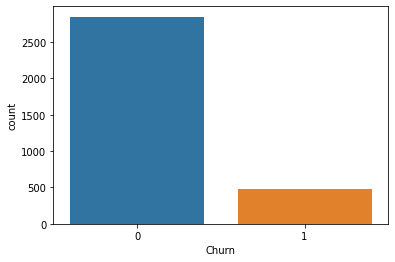

In [71]:
import seaborn as sns
sns.countplot(telecom_churn_df['Churn'],label="Count")

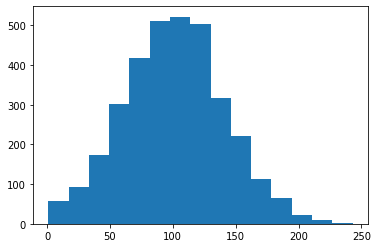

In [72]:
plt.hist(telecom_churn_df['AccountWeeks'],bins=15)
plt.show()

## Shapiro–Wilk test

### The null-hypothesis of this test is that the population is normally distributed. 

The Shapiro-Wilk test is a way to tell if a random sample comes from a normal distribution.

Thus, if the p value is less than the chosen alpha level, then the null hypothesis is rejected and there is evidence that the data tested are not normally distributed. 

On the other hand, if the p value is greater than the chosen alpha level, then the null hypothesis (that the data came from a normally distributed population) can not be rejected (e.g., for an alpha level of .05, a data set with a p value of less than .05 rejects the null hypothesis that the data are from a normally distributed population).

This hypothesis is rejected if the critical value P for the test statistic W is less than 0.05.

Formula for generating 

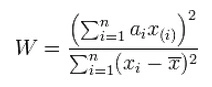

where:

xi are the ordered random sample values

ai are constants generated from the covariances, variances and means of the sample (size n) from a normally distributed sample.

In [73]:
from scipy.stats import shapiro
stat,p= (shapiro(telecom_churn_df['AccountWeeks']))
print("Test Statistics", stat)
print("P - value - ",p)
alpha=0.05

if p > alpha: 
    print('AccountWeeks is Gaussian')
else: 
    print('AccountWeeks is not Gaussian')

Test Statistics 0.9982772469520569
P - value -  0.0011495520593598485
AccountWeeks is not Gaussian


### visual check for Normality

Q-Q(quantile-quantile) plots play a very vital role to graphically analyze and compare two probability distributions by 
plotting their quantiles against each other.

If all the points plotted on the graph perfectly lies on a straight line then we can clearly say that this distribution is 
Normally distribution because it is evenly aligned with the standard normal variate which is the simple concept of Q-Q plot.

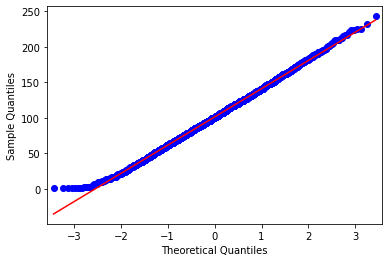

In [74]:
from statsmodels.graphics.gofplots import qqplot   #Data quantile vs normal quantile
qqplot(telecom_churn_df['AccountWeeks'],line='s')
plt.show()

### Anderson–Darling test

The Anderson-Darling tests if data comes from a particular distribution. The null hypothesis — sample comes from a population 
that follows a particular distribution. 

The Anderson-Darling test makes use of the specific distribution in calculating critical values.

This has the advantage of allowing a more sensitive test and the disadvantage that critical values must be calculated for each distribution.

In this case, we will be testing if our data comes from a normal distribution.

In [75]:
from scipy.stats import anderson

result = anderson(telecom_churn_df['AccountWeeks'])

print('Statistic: %.3f' % result.statistic)

p = 0

print('Critical Values',result.critical_values)


for i in range(len(result.critical_values)): 
    sl, cv = result.significance_level[i], result.critical_values[i]
    
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 0.426
Critical Values [0.575 0.655 0.786 0.917 1.091]
15.000: 0.575, data looks normal (fail to reject H0)
10.000: 0.655, data looks normal (fail to reject H0)
5.000: 0.786, data looks normal (fail to reject H0)
2.500: 0.917, data looks normal (fail to reject H0)
1.000: 1.091, data looks normal (fail to reject H0)


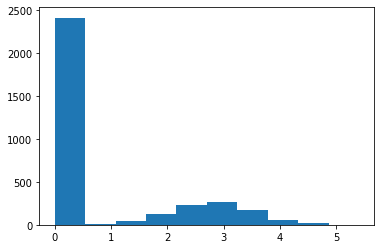

In [76]:
plt.hist(telecom_churn_df['DataUsage'],bins=10)
plt.show()

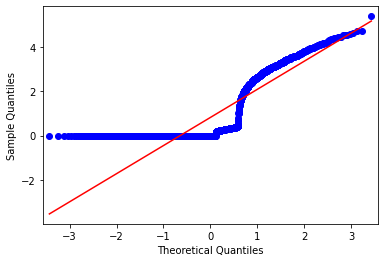

In [77]:
qqplot(telecom_churn_df['DataUsage'],line='s')
plt.show()

### Why Transformation ?

#### Guassian Transformation

Some machine learning algorithms like linear and logistic assume that the features are normally distributed
-Accuracy - Performance
- logarithmic transformation
- reciprocal transformation
- square root transformation
- exponential transformation (more general, you can use any exponent)
- boxcox transformation

### Logarithmic transformation

Perform data transformation to Normalized the data

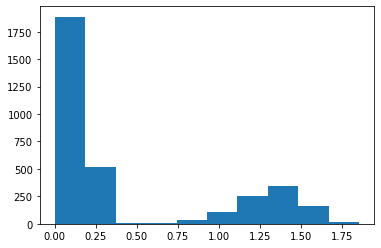

In [78]:
x=np.log(telecom_churn_df['DataUsage']+1)
plt.hist(x,bins=10)
plt.show()

this value is not Gaussian

we will not consider this value

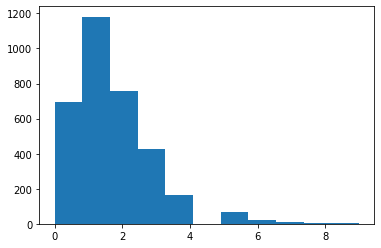

In [79]:
plt.hist(telecom_churn_df['CustServCalls'],bins=11)
plt.show()

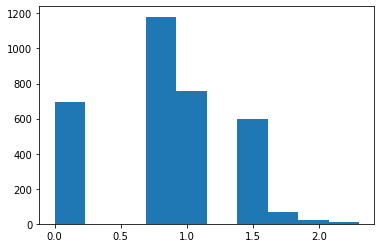

In [80]:
x=np.log(telecom_churn_df['CustServCalls']+1)
plt.hist(x,bins=10)
plt.show()

In [81]:
#this value is not Gaussian
# we will not consider this value

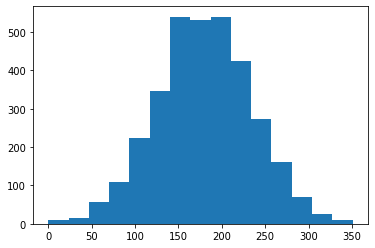

In [82]:
plt.hist(telecom_churn_df['DayMins'],bins=15)
plt.show()

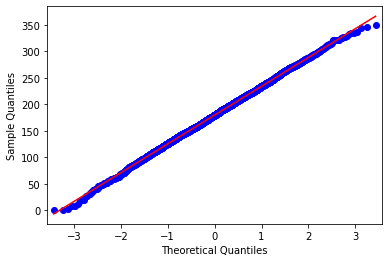

In [83]:
qqplot(telecom_churn_df['DayMins'],line='s')
plt.show()

In [84]:
stat,p= (shapiro(telecom_churn_df['DayMins']))
alpha=0.05

if p > alpha: 
    print('DayMins is Gaussian')
else: 
    print('DayMins is not Gaussian')

DayMins is Gaussian


In [85]:
# we will consider this variable

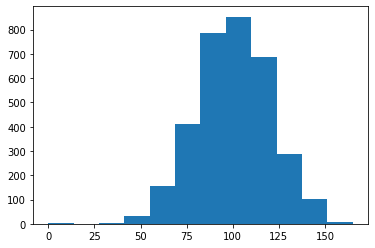

In [86]:
plt.hist(telecom_churn_df['DayCalls'],bins=12)
plt.show()

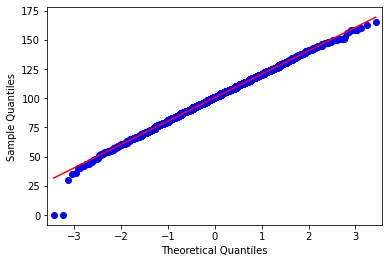

In [87]:
qqplot(telecom_churn_df['DayCalls'],line='s')
plt.show()

In [88]:
stat,p= (shapiro(telecom_churn_df['DayCalls']))
alpha=0.05

if p > alpha: 
    print('DayCalls is Gaussian')
else: 
    print('DayCalls is not Gaussian')

DayCalls is not Gaussian


In [89]:
y=(telecom_churn_df['DayCalls']==0)

In [90]:
#how many zero values
print('# rows with zero values',y.sum())

# rows with zero values 2


In [91]:
# we have excluded these 2 rows
telecom_churn_df=telecom_churn_df[telecom_churn_df['DayCalls']!=0]

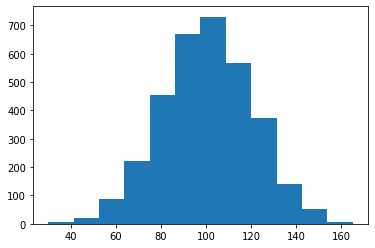

In [92]:
plt.hist(telecom_churn_df['DayCalls'],bins=12)
plt.show()

In [93]:
stat,p= (shapiro(telecom_churn_df['DayCalls']))
alpha=0.05

if p > alpha: 
    print('DayCalls is Gaussian')
else: 
    print('DayCalls is not Gaussian')

DayCalls is Gaussian


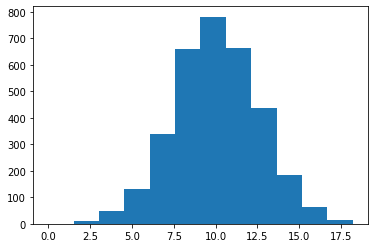

In [94]:
plt.hist(telecom_churn_df['OverageFee'],bins=12)
plt.show()

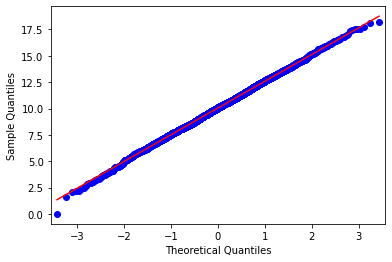

In [95]:
qqplot(telecom_churn_df['OverageFee'],line='s')
plt.show()

In [96]:
stat,p= (shapiro(telecom_churn_df['OverageFee']))
alpha=0.05

if p > alpha: 
    print('MonthlyCharge trnasform data is Gaussian')
else: 
    print('MonthlyCharge trnasform data is not Gaussian')

MonthlyCharge trnasform data is Gaussian


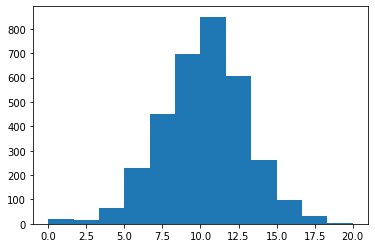

In [97]:
plt.hist(telecom_churn_df['RoamMins'],bins=12)
plt.show()

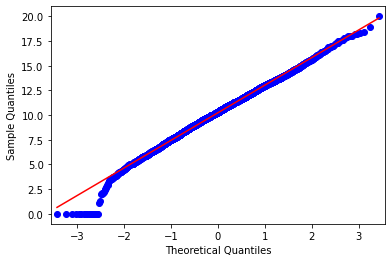

Customers not availaing Roaming 18


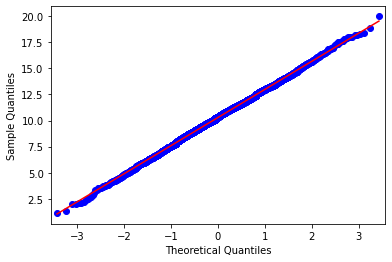

In [98]:
qqplot(telecom_churn_df['RoamMins'],line='s')
plt.show()
z3=telecom_churn_df['RoamMins']==0
print('Customers not availaing Roaming',sum(z3))

#dropping these ones
telecom_churn_df=telecom_churn_df[-z3]
qqplot(telecom_churn_df['RoamMins'],line='s')
plt.show()

In [99]:
stat,p= (shapiro(telecom_churn_df['OverageFee']))
alpha=0.05

if p > alpha: 
    print('MonthlyCharge trnasform data is Gaussian')
else: 
    print('MonthlyCharge trnasform data is not Gaussian')

MonthlyCharge trnasform data is Gaussian


### Compute the sample skewness of a data set.

skewness = 0 : normally distributed.

skewness > 0 : more weight in the left tail of the distribution.

skewness < 0 : more weight in the right tail of the distribution. 

A "skewed right" distribution is one in which the tail is on the right side. 

A "skewed left" distribution is one in which the tail is on the left side.

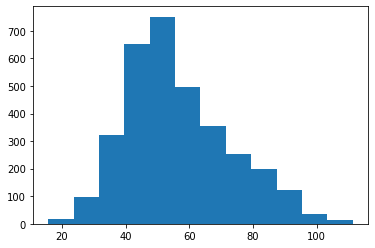

Data has high right skew of 0.6009128081005978


In [100]:
plt.hist(telecom_churn_df['MonthlyCharge'],bins=12)
plt.show()

from scipy.stats import skew
x=telecom_churn_df['MonthlyCharge']
print('Data has high right skew of',skew(telecom_churn_df['MonthlyCharge']))

### Trsansformation to convert data in to Normal distribution

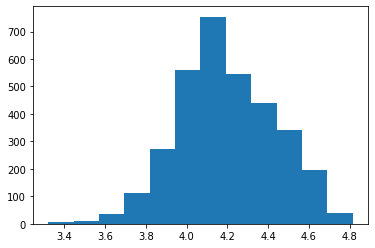

Data has virtually no skew ; approx skew: 0.0004748300159473763


In [101]:
#trying out some transformation
x1=np.log(telecom_churn_df['MonthlyCharge']+12)
plt.hist(x1,bins=12)
plt.show()
print('Data has virtually no skew ; approx skew:',skew(x1))

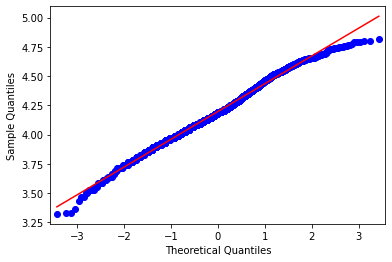

In [102]:
qqplot(x1,line='s')
plt.show()

In [103]:
print('mean',round(np.min(x1),2))
print('mean',round(np.mean(x1),2))
print('median',np.percentile(x1,25).round(2))
print('median',np.percentile(x1,50).round(2))
print('median',np.percentile(x1,75).round(2))
print('mean',round(np.max(x1)))

mean 3.32
mean 4.2
median 4.04
median 4.19
median 4.36
mean 5


### Box-cox transformation

A Box Cox transformation is a transformation of a non-normal dependent variables into a normal shape. 

Transformation technique is useful to stabilize variance, make the data more normal distribution-like, improve the validity of measures of association.

The Box-Cox transformation is defined as: 

T(Y)=(Y exp(λ)−1)/λ

where Y is the response variable and λ is the transformation parameter. λ varies from -5 to 5. In the transformation, all values of λ  are considered and the optimal value for a given variable is selected.


condition - Non negative values in the feature, Not even zero.

In [104]:
telecom_churn_df['MonthlyCharge'].describe()

count    3313.000000
mean       56.381890
std        16.406687
min        15.700000
25%        45.000000
50%        53.700000
75%        66.300000
max       111.300000
Name: MonthlyCharge, dtype: float64

In [129]:
telecom_churn_df[telecom_churn_df['MonthlyCharge'] < 0]

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,MonthlyCharge_t


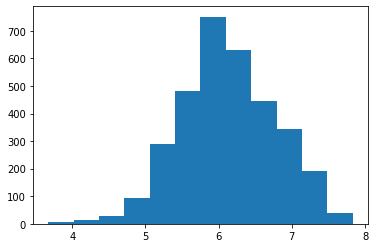

Data has virtually no skew ; approx skew: 0.0028678484568669537


In [105]:
#Box-cox transformation
import scipy.stats as scp
z3=scp.boxcox(telecom_churn_df['MonthlyCharge'], lmbda=0.2, alpha=12)
plt.hist(z3,bins=12)
plt.show()
print('Data has virtually no skew ; approx skew:',skew(z3))

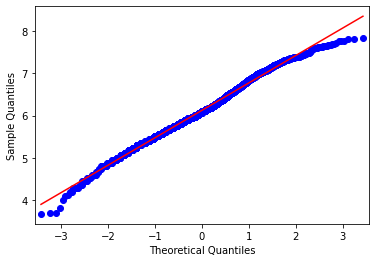

In [106]:
qqplot(z3,line='s')
plt.show()

In [107]:
print('min',round(np.min(z3),2))
print('0.25 percentile',np.percentile(z3,0.25).round(2))
print('mean',np.mean(z3))
print('Q1',np.percentile(z3,25).round(2))
print('Q2',np.percentile(z3,50).round(2))
print('Q3',np.percentile(z3,75).round(2))
print('max',np.max(z3).round(2))
print('99.75 percentile',np.percentile(z3,99.75).round(2))

min 3.67
0.25 percentile 4.22
mean 6.124438667376959
Q1 5.71
Q2 6.09
Q3 6.57
max 7.83
99.75 percentile 7.69


In [108]:
telecom_churn_df['MonthlyCharge_t']=z3
pos1=telecom_churn_df['MonthlyCharge_t']<np.percentile(telecom_churn_df['MonthlyCharge_t'],0.25)
pos2=telecom_churn_df['MonthlyCharge_t']>np.percentile(telecom_churn_df['MonthlyCharge_t'],99.75)
print('Count for values less than flooring of', np.percentile(x1,0.25).round(2),'is',pos1.sum())
print('Count for values more than ceiling of',np.percentile(x1,99.75).round(2),'is',pos2.sum())
telecom_churn_df=telecom_churn_df[-pos1]
telecom_churn_df=telecom_churn_df[-pos2]

Count for values less than flooring of 3.5 is 9
Count for values more than ceiling of 4.76 is 9


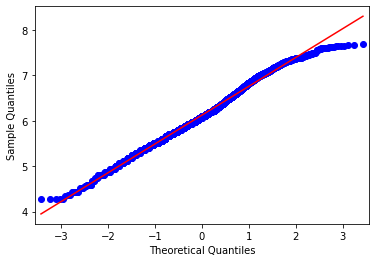

In [109]:
telecom_churn_df['MonthlyCharge_t'].describe()
qqplot(telecom_churn_df['MonthlyCharge_t'],line='s')
plt.show()


In [110]:
stat,p= (shapiro(telecom_churn_df['MonthlyCharge_t']))
alpha=0.05

if p > alpha: 
    print('MonthlyCharge_t is Gaussian')
else: 
    print('MonthlyCharge_t is not Gaussian')

MonthlyCharge_t is not Gaussian


In [111]:
result = anderson(telecom_churn_df['MonthlyCharge_t'])

print('Statistic: %.3f' % result.statistic)

p = 0

for i in range(len(result.critical_values)): 
    sl, cv = result.significance_level[i], result.critical_values[i]

    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 6.078
15.000: 0.575, data does not look normal (reject H0)
10.000: 0.655, data does not look normal (reject H0)
5.000: 0.786, data does not look normal (reject H0)
2.500: 0.917, data does not look normal (reject H0)
1.000: 1.091, data does not look normal (reject H0)


In [112]:
# we will use this transformed variable alongside Accountweeks,DayMins, dayCalls, OverageFees and RoamMins

In [113]:
# we will do LDR using Maholobolis method
telecom_churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3295 entries, 0 to 3332
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3295 non-null   int64  
 1   AccountWeeks     3295 non-null   int64  
 2   ContractRenewal  3295 non-null   int64  
 3   DataPlan         3295 non-null   int64  
 4   DataUsage        3295 non-null   float64
 5   CustServCalls    3295 non-null   int64  
 6   DayMins          3295 non-null   float64
 7   DayCalls         3295 non-null   int64  
 8   MonthlyCharge    3295 non-null   float64
 9   OverageFee       3295 non-null   float64
 10  RoamMins         3295 non-null   float64
 11  MonthlyCharge_t  3295 non-null   float64
dtypes: float64(6), int64(6)
memory usage: 334.6 KB


In [114]:
# we will use Mahalobolis classifier for this problem
#step1 : check for group totals


In [115]:
print(telecom_churn_df.groupby('Churn').sum())

       AccountWeeks  ContractRenewal  DataPlan  DataUsage  CustServCalls  \
Churn                                                                      
0            283860             2630       830    2422.61           4083   
1             49196              343        79     258.57           1064   

        DayMins  DayCalls  MonthlyCharge  OverageFee  RoamMins  \
Churn                                                            
0      493838.3    282364       157227.1    28037.41   28740.7   
1       99619.9     48628        28425.7     5101.74    5119.4   

       MonthlyCharge_t  
Churn                   
0         17192.641823  
1          2992.272761  


In [116]:
print(telecom_churn_df.groupby('Churn').std())

       AccountWeeks  ContractRenewal  DataPlan  DataUsage  CustServCalls  \
Churn                                                                      
0         39.961546         0.248416  0.456009   1.279780       1.165358   
1         39.466460         0.451372  0.371503   1.138066       1.850332   

         DayMins   DayCalls  MonthlyCharge  OverageFee  RoamMins  \
Churn                                                              
0      49.299709  19.752993      16.131738    2.511450  2.663494   
1      67.978149  21.145915      15.620072    2.559235  2.760866   

       MonthlyCharge_t  
Churn                   
0             0.633440  
1             0.629828  


In [117]:
# step2 : correlation matrix
telecom_churn_final = telecom_churn_df
telecom_churn_final=telecom_churn_final.drop(["ContractRenewal","DataPlan","DataUsage","CustServCalls","MonthlyCharge"],axis=1)

In [118]:
telecom_churn_final.corr(method='pearson')

,Churn,AccountWeeks,DayMins,DayCalls,OverageFee,RoamMins,MonthlyCharge_t
Churn,1.000000,0.016819,0.214199,0.022048,0.096753,0.063266,0.078623
AccountWeeks,0.016819,1.000000,0.010808,0.037080,-0.003976,0.014647,0.017229
DayMins,0.214199,0.010808,1.000000,0.001354,-0.007308,-0.020470,0.591425
DayCalls,0.022048,0.037080,0.001354,1.000000,-0.022244,0.028150,-0.009114
OverageFee,0.096753,-0.003976,-0.007308,-0.022244,1.000000,-0.018930,0.287457
RoamMins,0.063266,0.014647,-0.020470,0.028150,-0.018930,1.000000,0.073243
MonthlyCharge_t,0.078623,0.017229,0.591425,-0.009114,0.287457,0.073243,1.000000


In [119]:
#high correlation between DayMins and MonthlyCharge_t; we can dropformer
telecom_churn_final=telecom_churn_final.drop(["DayMins"],axis=1)

In [120]:
telecom_churn_final.corr(method='pearson')

,Churn,AccountWeeks,DayCalls,OverageFee,RoamMins,MonthlyCharge_t
Churn,1.000000,0.016819,0.022048,0.096753,0.063266,0.078623
AccountWeeks,0.016819,1.000000,0.037080,-0.003976,0.014647,0.017229
DayCalls,0.022048,0.037080,1.000000,-0.022244,0.028150,-0.009114
OverageFee,0.096753,-0.003976,-0.022244,1.000000,-0.018930,0.287457
RoamMins,0.063266,0.014647,0.028150,-0.018930,1.000000,0.073243
MonthlyCharge_t,0.078623,0.017229,-0.009114,0.287457,0.073243,1.000000


In [121]:
#step2 : we will standardize data
from sklearn import preprocessing
telecom_churn_x=telecom_churn_final.drop(["Churn"],axis=1)
telecom_churn_y=telecom_churn_final["Churn"]
telecom_churn_x.describe()

,AccountWeeks,DayCalls,OverageFee,RoamMins,MonthlyCharge_t
count,3295.000000,3295.000000,3295.000000,3295.000000,3295.000000
mean,101.079211,100.452807,10.057405,10.276206,6.125922
std,39.889649,19.963038,2.529929,2.682816,0.634786
min,1.000000,30.000000,0.000000,1.100000,4.278004
25%,74.000000,87.000000,8.345000,8.500000,5.705637
50%,101.000000,101.000000,10.080000,10.300000,6.090851
75%,127.000000,114.000000,11.770000,12.100000,6.566638
max,243.000000,165.000000,18.190000,18.900000,7.680171


In [122]:
#x=preprocessing.scale(telecom_churn_x)
#x.T

In [123]:
#telecom_churn_x2=pd.DataFrame(x,columns=['wks','calls_d','plan','roam','monthly_t'])
#telecom_churn_x2.describe().transpose()

In [124]:
#low correlation seen between variables
# we will use the Levenes test for checking variance
#from scipy.stats import levene
#levene(telecom_churn_x2['wks'],telecom_churn_x2['calls_d'],telecom_churn_x2['plan'],telecom_churn_x2['roam'],telecom_churn_x2['monthly_t'])


In [125]:
#Box's M test

In [126]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(telecom_churn_x, telecom_churn_y, test_size=0.3, random_state=111)

In [127]:
#transform data
#from sklearn.preprocessing import StandardScaler

#sc = StandardScaler()
#x_train = sc.fit_transform(x_train)
#x_test = sc.transform(x_test)

In [128]:
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

#lda = LDA(n_components=1)
#x_train = lda.fit_transform(x_train, y_train)
#x_test = lda.transform(x_test)